# Introduction to Random Sampling Strategies

In this section we will learn about different random sampling strategies and in which cases they are useful.

This notebook covers the following strategies:
- sampling from a normal distribution
- sampling from a uniform distribution
- sampling with a latin hypercube

You will explore the generated treatment combinations and compare them visually.

You are also going to scale the gathered treatments to a certain value range to keep the differently collected treatments as comparable as possible.

## Setup

First, we set the general parameters and methods which will be used at each stage of this notebook.

The parameters in this case are:
- the sample size
- the number of factors.
- the value range for the levels

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

n_samples = 100
n_factors = 2
range = (-1, 1)

### Scaling

Before gathering the different treatments, we will implement a scaling method.

This scaling method will scale the gathered treatments to a given range.

In [2]:
def scale(x, range):
    """
    Scale the input to the given range.
    Args:
        x: the input to scale. Can be any type that can be converted to a numpy array.
        range: the range to scale to. Must be a tuple of length 2, with the first element being the minimum and the second element being the maximum.
    """
    assert len(range) == 2, "range must be a tuple of length 2."
    
    # add your code here
    # Tip: normalize the array first, then scale it to the range
    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    x = x * (range[1] - range[0]) + range[0]

    return x

Does it work properly? Let's see!

In [3]:
array = [1, 2, 3, 4, 5, 6]

array = scale(array, range)

assert np.min(array) == range[0], f"Minimum of scaled array is not equal to minimum of range.\nThe scaled array is {array}."
assert np.max(array) == range[1], f"Maximum of scaled array is not equal to maximum of range.\nThe scaled array is {array}."
print(f"Well done! Looks like your scaling method works as expected!\nThe scaled array is {array}.")

Well done! Looks like your scaling method works as expected!
The scaled array is [-1.  -0.6 -0.2  0.2  0.6  1. ].


## Sampling from a normal distribution

The first sampling strategy which we will implement is sampling from a normal distribution.

We take the numpy.random.normal method.

You can take a look at the [official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html), if you are not familiar with it.

Use the parameters from the Setup section.

In [4]:
# generate the treatment combinations with a normal distribution
# add your code here
treatments_normal = np.random.normal(size=(n_samples, n_factors))

# scale the treatment combinations to the range (-1, 1) with your scale function
# add your code here
treatments_normal = scale(treatments_normal, range)

Did it work? Let's inspect the result in a scatter plot.

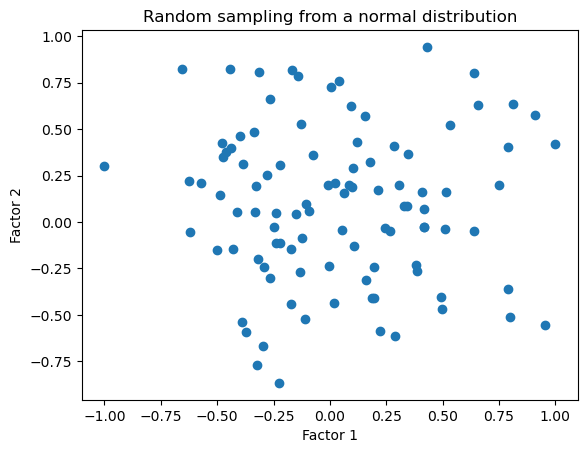

In [5]:
plt.scatter(treatments_normal[:, 0], treatments_normal[:, 1])
plt.title('Random sampling from a normal distribution')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

How does the result look like?

Which areas were covered well and which less?

Increase the sample size and re-run the code to see how the gathered treatmens change. 

## Sampling from a uniform distribution

The second sampling strategy which we will implement is sampling from a uniform distribution.

We take the numpy.random.normal method.

You can take a look at the [official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html), if you are not familiar with it.

Use the parameters from the Setup section.

In [6]:
treatments_uniform = None

# generate the treatment combinations with a uniform distribution
# add your code here
treatments_uniform = np.random.uniform(low=-1, high=1, size=(n_samples, n_factors))

# We do not have to scale the uniform distribution in this case because it is already in the range (-1, 1)

Did it work? Let's inspect the result in a scatter plot.

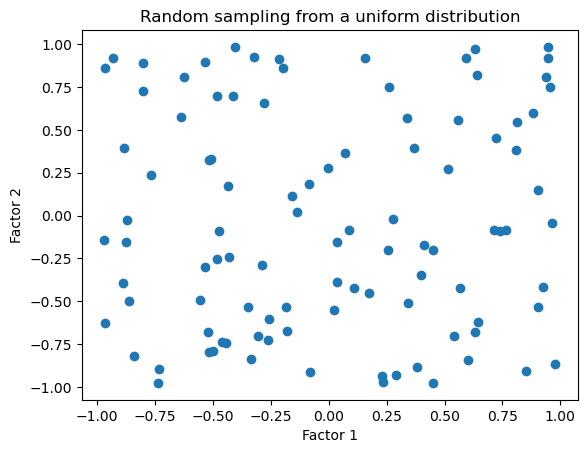

In [7]:
plt.scatter(treatments_uniform[:, 0], treatments_uniform[:, 1])
plt.title('Random sampling from a uniform distribution')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

How does the result look like?

Which areas were covered well and which less?

Increase the sample size and re-run the code to see how the gathered treatmens change. 

## Sampling from a Latin Hypercube

Lastly, we will implement the latin hypercube strategy.

For that we will take the scipy.stats.qmc.LatinHypercube method.

Please make yourself familiar with it through the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.qmc.LatinHypercube.html).

And here again - use the parameters from the setup.

Tip: We import the LatinHypercube class from scipy. Use the 'random' method of this class to create the treatment combinations.

In [8]:
from scipy.stats.qmc import LatinHypercube

# generate the treatment combinations with a normal distribution
# add your code here
latinhypercube = LatinHypercube(d=n_factors)
treatments_lhc = latinhypercube.random(n_samples)

# scale the treatment combinations to the range (-1, 1) with your scale function
# add your code here
treatments_lhc = scale(treatments_lhc, range)

Did it work? Let's inspect the result in a scatter plot.

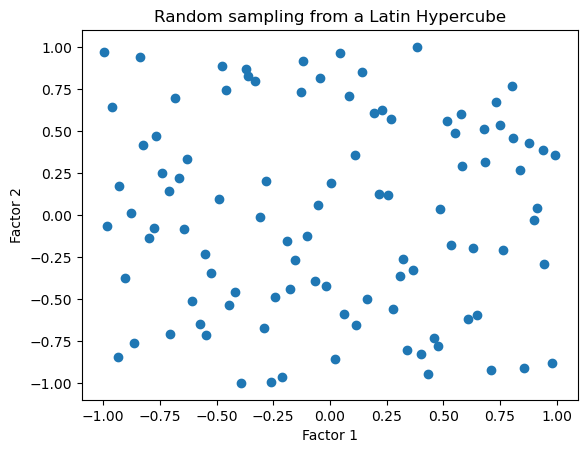

In [9]:
plt.scatter(treatments_lhc[:, 0], treatments_lhc[:, 1])
plt.title('Random sampling from a Latin Hypercube')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

How does the result look like?

Which areas were covered well and which less?

Does it look any different from the normal distribution?

Increase the sample size and re-run the code to see how the gathered treatmens change.

## Detailed analysis of the obtained results

Here we will now analyze the obtained results with respect to their coverage.

We will compute the coverage and plot a 2D histogram of the differently gathered treatments. 

This will give us a better idea of the differences - especially between uniform and Latin Hypercube sampling - than simple scatter plots.

First of all, copy the sampling commands which you already implemented into the following cell so we do not have to re-run each cell when changing the sample size.

(And don't forget to scale here as well)

For the Latin Hypercube:
    Make this time use of the 'optimization' keyword and watch the difference

In [10]:
n_samples = 100
np.random.seed(0)

treatments_normal = scale(np.random.normal(0, 1, (n_samples, n_factors)), range)
treatments_uniform = np.random.uniform(range[0], range[1], (n_samples, n_factors))
treatments_lhc = scale(LatinHypercube(d=n_factors, optimization='lloyd').random(n_samples), range)

Let's compute the coverage of the treatments with respect to the design space!

The steps for our analysis look as follows:
1. Compute the target coverage which is $target=\frac{n_\text{samples}}{n_\text{bins}**n_\text{factors}}$
2. Compute 2D Histograms for each of the methods where the number of samples per bin is counted
3. Compute the bin-wide coverage for each method
4. Compute under-, over- and highly over-represented bins ($bin_\text{count}<target$; $bin_\text{count}>target$; $bin_\text{count}>target*threshold$)

In [11]:
hist_bins = 10
threshold_highly_overrepresented = 2

# compute the target coverage
target_coverage = np.max((n_samples/(hist_bins**n_factors), 1))
threshold_highly_overrepresented = target_coverage * threshold_highly_overrepresented
print(f'Target coverage: {target_coverage} samples per bin')

# compute 2D histograms for each sampling method with the numpy method
hist_normal = np.histogram2d(treatments_normal[:, 0], treatments_normal[:, 1], bins=hist_bins)[0]
hist_uniform = np.histogram2d(treatments_uniform[:, 0], treatments_uniform[:, 1], bins=hist_bins)[0]
hist_lhc = np.histogram2d(treatments_lhc[:, 0], treatments_lhc[:, 1], bins=hist_bins)[0]

# compute the actual coverage for each sampling method
coverage_normal = np.round(np.sum(hist_normal > 0)/(hist_bins**n_factors) * 100, 2)
coverage_uniform = np.round(np.sum(hist_uniform > 0)/(hist_bins**n_factors) * 100, 2)
coverage_lhc = np.round(np.sum(hist_lhc > 0)/(hist_bins**n_factors) * 100, 2)

# compute the amount of underrepresented bins for each sampling method
underrep_normal = round(np.sum(hist_normal < target_coverage)/(hist_bins**n_factors) * 100, 2)
underrep_uniform = round(np.sum(hist_uniform < target_coverage)/(hist_bins**n_factors) * 100, 2)
underrep_lhc = round(np.sum(hist_lhc < target_coverage)/(hist_bins**n_factors) * 100, 2)

# compute the amount of overrepresented bins for each sampling method
overrep_normal = round(np.sum(hist_normal > target_coverage)/(hist_bins**n_factors) * 100, 2)
overrep_uniform = round(np.sum(hist_uniform > target_coverage)/(hist_bins**n_factors) * 100, 2)
overrep_lhc = round(np.sum(hist_lhc > target_coverage)/(hist_bins**n_factors) * 100, 2)

# compute the amount of highly overrepresented bins for each sampling method
highly_overrep_normal = round(np.sum(hist_normal > threshold_highly_overrepresented)/(hist_bins**n_factors) * 100, 2)
highly_overrep_uniform = round(np.sum(hist_uniform > threshold_highly_overrepresented)/(hist_bins**n_factors) * 100, 2)
highly_overrep_lhc = round(np.sum(hist_lhc > threshold_highly_overrepresented)/(hist_bins**n_factors) * 100, 2)

# print the results in a table
print(f'{"-"*25:<25} {"-"*15:<15} {"-"*25:<25} {"-"*25:<25} {"-"*25:<25}')
print(f'{"Sampling method":<25} {"Coverage [%]":<15} {"Underrepresented [%]":<25} {"Overrepresented [%]":<25} {"Highly overrepresented [%]":<25}')
print(f'{"-"*25:<25} {"-"*15:<15} {"-"*25:<25} {"-"*25:<25} {"-"*25:<25}')
print(f'{"Normal distribution":<25} {coverage_normal:<15} {underrep_normal:<25} {overrep_normal:<25} {highly_overrep_normal:<25}')
print(f'{"Uniform distribution":<25} {coverage_uniform:<15} {underrep_uniform:<25} {overrep_uniform:<25} {highly_overrep_uniform:<25}')
print(f'{"Latin Hypercube":<25} {coverage_lhc:<15} {underrep_lhc:<25} {overrep_lhc:<25} {highly_overrep_lhc:<25}')
print(f'{"-"*25:<25} {"-"*15:<15} {"-"*25:<25} {"-"*25:<25} {"-"*25:<25}')


Target coverage: 1.0 samples per bin
------------------------- --------------- ------------------------- ------------------------- -------------------------
Sampling method           Coverage [%]    Underrepresented [%]      Overrepresented [%]       Highly overrepresented [%]
------------------------- --------------- ------------------------- ------------------------- -------------------------
Normal distribution       54.0            46.0                      28.0                      15.0                     
Uniform distribution      63.0            37.0                      24.0                      12.0                     
Latin Hypercube           87.0            13.0                      13.0                      0.0                      
------------------------- --------------- ------------------------- ------------------------- -------------------------


Let's make the corresponding plots!

The plotting is already implemented to make your life a little bit easier. 

You are still very welcome to go through the plotting code on your own as oftentimes this can be a quite challenging part!

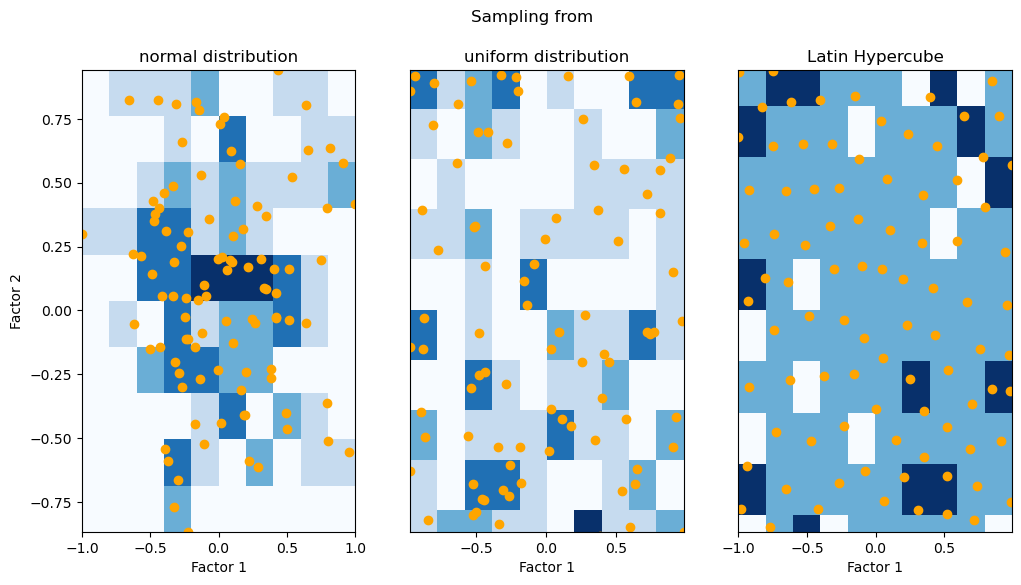

In [12]:
scatter = True

# make a figure with three subplots for the three sampling methods
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# plot the samples from the normal distribution on the first subplot
axes[0].hist2d(treatments_normal[:, 0], treatments_normal[:, 1], bins=hist_bins, cmap='Blues')
if scatter:
    axes[0].scatter(treatments_normal[:, 0], treatments_normal[:, 1], color='orange')
axes[0].set_title('normal distribution')
axes[0].set_xlabel('Factor 1')
axes[0].set_ylabel('Factor 2')

# plot the samples from the uniform distribution on the second subplot
axes[1].hist2d(treatments_uniform[:, 0], treatments_uniform[:, 1], bins=hist_bins, cmap='Blues')
if scatter:
    axes[1].scatter(treatments_uniform[:, 0], treatments_uniform[:, 1], color='orange')
axes[1].set_title('uniform distribution')
axes[1].set_xlabel('Factor 1')

# plot the LHS samples on the third subplot
axes[2].hist2d(treatments_lhc[:, 0], treatments_lhc[:, 1], bins=hist_bins, cmap='Blues')
if scatter:
    axes[2].scatter(treatments_lhc[:, 0], treatments_lhc[:, 1], color='orange')
axes[2].set_title('Latin Hypercube')
axes[2].set_xlabel('Factor 1')

# set figure title
fig.suptitle('Sampling from')

# share y axis
axes[1].sharey(axes[0])
axes[2].sharey(axes[0])
# hide y axis for the second and third subplot
axes[1].get_yaxis().set_visible(False)
axes[2].get_yaxis().set_visible(False)

plt.show()

After doing all these analysis: What's your impression of the different random sampling methods?

Can you think of use-cases for each of the method?

Can you tell now a difference between the uniform and Latin Hypercube sampling?

## Congratulations!

You've finished the tutorial on random sampling!